## Linear regression

**Y = wX+b**

Y --> Dependent variable  
x --> Independent variable  
w --> Weight (slope)  
b --> Bias (intercept)

## Gradient descent

Optimization algorithm used for minimizing the loss function of various machine learning algorithms. It is used to update the parameters of the learning model.

w = w - &alpha;*dw  
b = b - &alpha;*db

## Learning Rate

Tuning parameter that determines the step size at each iteration.

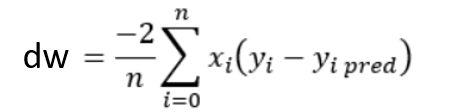

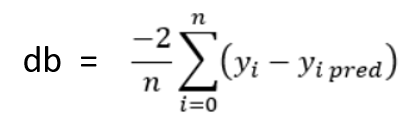

In [1]:
import numpy as np

## Linear regression

In [18]:
class Linear_Regression():
    
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
    
    
    def fit(self, X, Y):
        # number of training examples and number of features (rows, columns)
        self.m, self.n = X.shape
        # initiating weight and bias
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        
        # Implementing Gradient Descent
        for i in range(self.no_of_iterations):
            self.update_weights()
    
    
    def update_weights(self):
        Y_prediction = self.predict(self.X)
        
        # calculate gradients
        # self.m en este caso es el número de filas, por lo que vendría siendo "n" en la fórmula de dw.
        dw = -(2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
        db = -2 * np.sum(self.Y - Y_prediction) / self.m
        
        # Updating the weights
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db
    
    def predict(self, X):
        return X.dot(self.w) + self.b

## Using Linear Regression Model for Prediction

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Data Pre-Processing

In [4]:
# Loading data into pandas dataframe
salary_data = pd.read_csv('datasets/salary_data.csv')

In [5]:
# First 5 rows of df
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
# Last 5 rows of df
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [7]:
# Number of rows and columns

In [8]:
salary_data.shape

(30, 2)

In [10]:
# Checking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

## Separating features and target

In [11]:
X = salary_data.iloc[:, :-1].values
Y = salary_data.iloc[:, 1].values

In [12]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [13]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


## Splitting into train and test data

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=2)

## Training Linear Regression Model

In [37]:
model = Linear_Regression(learning_rate=0.02, no_of_iterations=1000)
# The learning rate magnitude depends on the data

In [38]:
model.fit(X_train, Y_train)

In [39]:
# Printing parameters values weight and bias
# Weight is created as a numpy array, while bias is just a number. That's why we use [0] for model.w
print(f'weight: {model.w[0]}')
print(f'bias: {model.b}')

weight: 9514.400999035135
bias: 23697.406507136307


**salary = 9514 \* (experience) + 23697**

## Predict salary value for test data

In [40]:
test_data_prediction = model.predict(X_test)

In [41]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


## Visualizing the predicted values and actual values

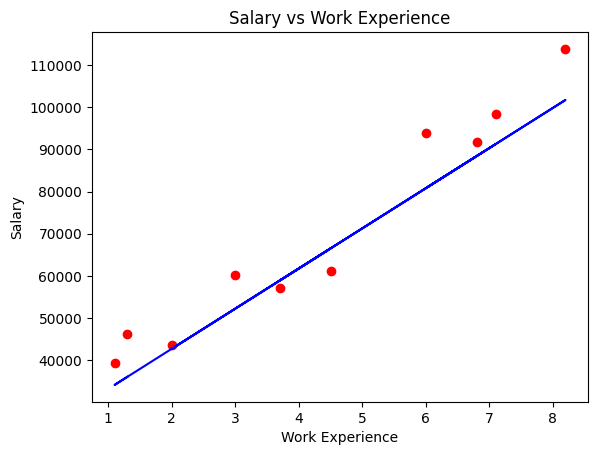

In [42]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Work Experience')
plt.show()